Ejercicio nro. 1

In [ ]:
!pip install pillow
from PIL import Image,ImageFilter
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt

In [ ]:
print('▀ Imágenes para ver ▀')
print(' Logro \n Escritorio \n Colaborativo')
# Diccionario con tres imágenes para elegir.
imagenes = {
            'logro':'''https://img.freepik.com/fotos-premium/retrato-felices-empresarios-pie-oficina-
                       mostrando-pulgar-arriba_484651-11267.jpg?size=626&ext=jpg&ga=GA1.1.920655583.
                       1698932241&semt=ais''',
            'escritorio' : '''https://img.freepik.com/foto-gratis/concepto-fiesta-linea-portatil-alto-
                              angulo_23-2149426582.jpg?t=st=1698938079~exp=1698938679~hmac=
                              40760bec652fa6a5ccead3cade0b8fe19155d9dd25f4e001112cdefb508eca3d''',
            'colaborativo' : '''https://img.freepik.com/foto-gratis/chicas-universitarias-estudiando-
                             juntas_23-2149038414.jpg?t=st=1699033022~exp=1699033622~hmac=
                             ca7ef8b4cfea0877b6001958a9281acbae997487ec2c9349433cd4601c00f40b'''
}
nombre_imagen = input('Elija una imágen entre estas opciones: ')
nombre_imagen = nombre_imagen.lower()
print('▀ Redes Sociales ▀')
print(' Facebook \n Twitter \n Instagram')
# Diccionario para visualizar la imágen elegida, en una red social, también a elección.
# A efectos de este código, las dimensiones son tomadas a la mitad de sus valores originales.
sizes_redes = {
                'facebook': (600, 315),
                'twitter': (512, 256),
                'instagram': (540, 283),
}
red_social = input('Ingrese la red social para visualizar la imágen elegida: ')
def look_image(nombre_imagen, red_social):
    ruta = imagenes.get(nombre_imagen)
    if ruta:
      response = requests.get(ruta)
      imagen = Image.open(BytesIO(response.content))
      size_redimen = sizes_redes.get(red_social.lower())
      if size_redimen:
        new_image = imagen.resize((size_redimen))
        display(new_image)
      else:
        print('Red social incorrecta')
    else:
      print('El nombre de la imagen es incorrecto')

look_image(nombre_imagen, red_social)

Ejercicio nro. 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Función que ecualiza a traves de su histograma, la imágen 'robot'.
def equal_robot(imagen):
  img = cv2.imread(imagen, 0) # Lee la imágen, en blanco y negro
  equ = cv2.equalizeHist(img) # Proceso de ecualización
  hist,bins = np.histogram(img.flatten(),256,[0,256]) # Crea el histograma
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel() # Convierte el array en unidimensional
  ax[0].imshow(img, cmap='gray') # Muestra la imágen original en escala de grises
  ax[0].set_title('imágen original')
  ax[1].imshow(equ, cmap='gray') # Muestra la imágen ecualizada en escala de grises
  ax[1].set_title('imágen ecualizada')
  cv2.imwrite('robot_imagen_original.png', img) # Guarda la imagen original
  cv2.imwrite('robot_imagen_ecualizada.png', equ) # Guarda la imagen ecualizada
  plt.show()

equal_robot('robot.jpg')

# Función que ecualiza a traves de su histograma, la imágen 'sotano'.
def equal_sotano(imagen):
  img2 = cv2.imread(imagen, 0)
  equ2 = cv2.equalizeHist(img2)
  hist,bins = np.histogram(img2.flatten(),256,[0,256])
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel()
  ax[0].imshow(img2, cmap='gray')
  ax[0].set_title('imágen original')
  ax[1].imshow(equ2, cmap='gray')
  ax[1].set_title('imágen ecualizada')
  cv2.imwrite('sotano_imagen_original.png', img2)
  cv2.imwrite('sotano_imagen_ecualizada.png', equ2)
  plt.show()

equal_sotano('sotano.jpg')

Ejercicio nro. 3

In [ ]:
!pip install pillow
from PIL import Image,ImageFilter
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
def nueva_imagen(filtro_use):
  mascota = Image.open('gatito.jpg')
  # Este diccionario toma el filtro de acuerdo a la elección.
  filtros = {'BLUR' : ImageFilter.BLUR,
             'CONTOUR' : ImageFilter.CONTOUR,
             'DETAIL' : ImageFilter.DETAIL,
             'EDGE ENHANCE' : ImageFilter.EDGE_ENHANCE,
             'EDGE ENHANCE MORE' : ImageFilter.EDGE_ENHANCE_MORE,
             'EMBOSS' : ImageFilter.EMBOSS,
             'FIND EDGES' : ImageFilter.FIND_EDGES,
             'SHARPEN' : ImageFilter.SHARPEN,
             'SMOOTH' : ImageFilter.SMOOTH}
  fig, axs = plt.subplots(1, len(filtros) + 1, figsize=(40, 20))
  print('Elija de la siguiente lista, el filtro que desea aplicar a la imagen')
  print()
  print('BLUR \nCONTOUR \nDETAIL \nEDGE ENHANCE \nEDGE ENHANCE MORE \nEMBOSS \nFIND EDGES \nSHARPEN \nSMOOTH')
  print()
  filtro_elegido = input()
  filtro_name = filtro_elegido.upper()# Convierte en mayúsculas para poder tomar los string del diccionario.
  print()
  print('Usted ha elegido el filtro: '+ filtro_elegido.upper())
  print()
  if filtro_name in filtros: # Itera sobre el diccionario
    filtro = filtros[filtro_name]
    new_mascota = mascota.filter(filtro) # Aplica el filtro elegido.
    display(new_mascota) # Muestra la imágen filtrada.
    new_mascota.save('Imágen_filtrada.jpg') # Guarda la imágen filtrada.
  else:
    print('El filtro elegido no pertenece a la lista de filtros')
  axs[0].imshow(mascota)# Muestra en el primer subplot la imágen original.
  axs[0].set_title("Imágen original")
  axs[0].axis('off')
  print()
  print('Esta es la imágen con los distintos filtros aplicados')
  print()
  # Este diccionario titula los subplots que se muestran al final.
  nombres_filtros = {ImageFilter.BLUR: 'Blur',
                     ImageFilter.CONTOUR: 'Contour',
                     ImageFilter.DETAIL: 'Detail',
                     ImageFilter.EDGE_ENHANCE: 'Edge Enhance',
                     ImageFilter.EDGE_ENHANCE_MORE: 'Edge Enhance More',
                     ImageFilter.EMBOSS: 'Emboss',
                     ImageFilter.FIND_EDGES: 'Find Edges',
                     ImageFilter.SHARPEN: 'Sharpen',
                     ImageFilter.SMOOTH: 'Smooth'}
  # Aplica y muestra los otros filtros en los subplots restantes
  for i, (filtro, nombre_filtro) in enumerate(nombres_filtros.items()):
    mascota_filtrada = mascota.filter(filtro)
    axs[i + 1].imshow(mascota_filtrada)
    axs[i + 1].set_title('Filtro aplicado: ' + nombre_filtro)
    axs[i + 1].axis('off')
  plt.show()

nueva_imagen(filtro_elegido)

Ejercicio nro. 4

Imágen procesada con el operador Laplacian



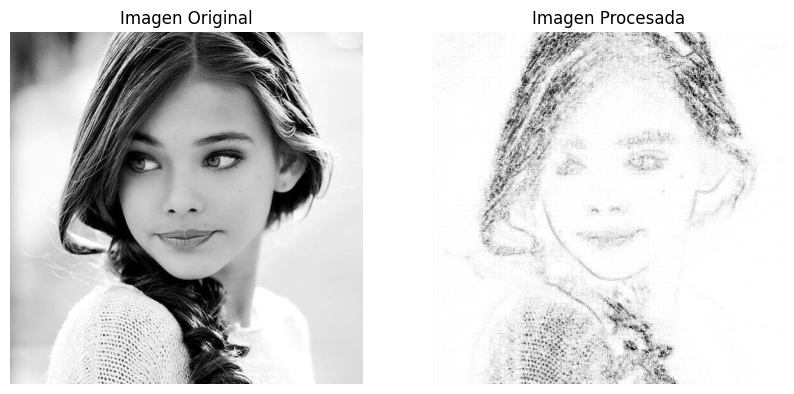


Utilización del operador Canny para realizar bocetos



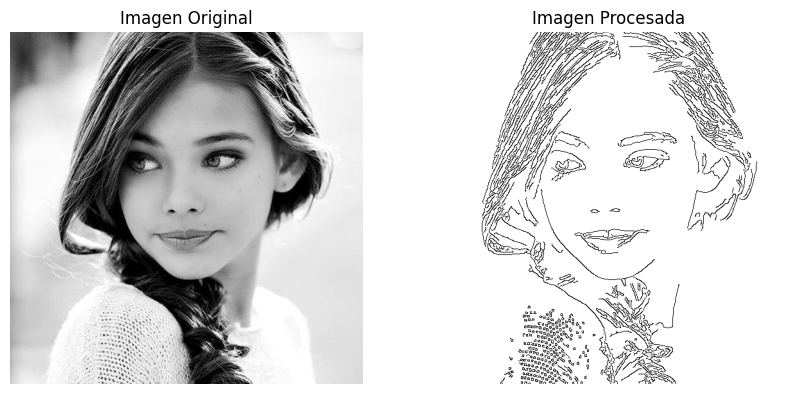

In [ ]:
# De las pruebas de distintos filtros para representar un boceto a partir de una imágen,
# Laplaciano y Canny sugieren una buena base para realizar un retrato, ya sea (a mi entender)
# como base para una pintura como para un dibujo.

def funcion_para_elegir():
  def crear_boceto():
    print('Imágen procesada con el operador Laplaciano')
    print()
    # Cargar la imagen en blanco y negro
    img = cv2.imread('mujer.jpg', 0)
    # En este caso no se aplica el suavizado porque hace a la imágen mas borrosa.
    # Aplicamos el operador Laplaciano para resaltar los bordes.
    img_bordes = cv2.Laplacian(img, cv2.CV_64F)
    # Esta función garantiza que los valores resultantes esten en el rango correcto
    # (0, 255), se conviertan a números enteros y sean adecuados para visualizar.
    img_bordes = cv2.convertScaleAbs(img_bordes)
    img_invertida = cv2.bitwise_not(img_bordes) # Invertir los colores (negro a blanco y viceversa)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Se generan los subplots
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(img_invertida, cmap='gray')
    axes[1].set_title('Imagen Procesada')
    axes[1].axis('off')
    plt.show()
    return img_invertida

  imagen_procesada = crear_boceto()# Llama a la función.
  cv2.imwrite("imagen_procesada.jpg", imagen_procesada)# Guarda la imagen resultante
  print()
  print('Utilización del operador Canny para realizar bocetos')
  print()
  def boceto():
    img = cv2.imread('mujer.jpg', 0) # Cargar la imagen en escala de grises.

    # Aplicamos un filtro gaussiano para suavizar la imagen.
    # y el operador Canny de cv2.
    img_suavizada = cv2.GaussianBlur(img, (5, 5), 0)
    img_bordes = cv2.Canny(img_suavizada, 50, 150)
    img_invertida = cv2.bitwise_not(img_bordes) # Invertimos los blancos y negros.
    fig, axes = plt.subplots(1, 2, figsize=(10, 10)) # Se generan los subplots.
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')
    axes[1].imshow(img_invertida, cmap='gray')
    axes[1].set_title('Imagen Procesada')
    axes[1].axis('off')
    plt.show()
    return img_invertida

  # Llamada a la función y guardado de la imagen resultante.
  imagen_procesada = boceto()
  cv2.imwrite('imagen_procesada2.jpg', imagen_procesada)

funcion_para_elegir()